In [1]:
import tqdm
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
from models import BondarKinematicModel, ArmstrongKinematicModel, KadaschevichKinematicModel, ChabocheKinematicModel
from matplotlib import pyplot as plt

uys = 960000000
dys = 960000000

def complex_fit(start, stop, step, every_n_point, model, initial, exp):
    consts = initial
    for end in tqdm(range(start, stop, step)):
        mod = model(E=102000000000, mu=0.33, dt=0.06*step, constants = consts, upper_yield_strength=uys, downer_yield_strength=dys)
        mod.fit(strain=exp.Strain.values[:end:every_n_point], 
            stress=exp.Stress.values[:end:every_n_point], 
            upper_yield_strength=uys, 
            downer_yield_strength=dys,
            initial_value=exp.Stress.values[0])
        consts = mod.constants
    return mod
    

In [4]:
type_1 = pd.read_csv('../../Курсач 2023/placticity data/Type_1_clear.txt', names=['Strain', 'Stress'])
type_1['Stress']*=1e6

type_2 = pd.read_csv('../../Курсач 2023/placticity data/Type_2_clear.txt', names=['Strain', 'Stress'])
type_2['Stress']*=1e6

type_5 = pd.read_csv('../../Курсач 2023/placticity data/Type_5_clear.txt', names=['Strain', 'Stress'])
type_5['Stress']*=1e6

type_6 = pd.read_csv('../../Курсач 2023/placticity data/Type_6_clear.txt', names=['Strain', 'Stress'])
type_6['Stress']*=1e6

In [5]:
a_model_fitted = complex_fit(100, 36000, 1000, 100, ArmstrongKinematicModel, {'g': 0, 'ga': 0}, type_6)

  0%|          | 0/36 [00:00<?, ?it/s]

C:\Users\Sergei\Диплом\notebooks\models.py:85: RuntimeWarning: overflow encountered in double_scalars
  d_alpha = 2/3*self.constants['g']*strain_rate + self.constants['ga']*alpha*intensity


In [6]:
a_model_fitted.constants

{'g': 0.00020300419437628184, 'ga': -0.038707028550387095}

In [7]:
end = 36000
stress_predicted = a_model_fitted.predict(strain=type_6.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

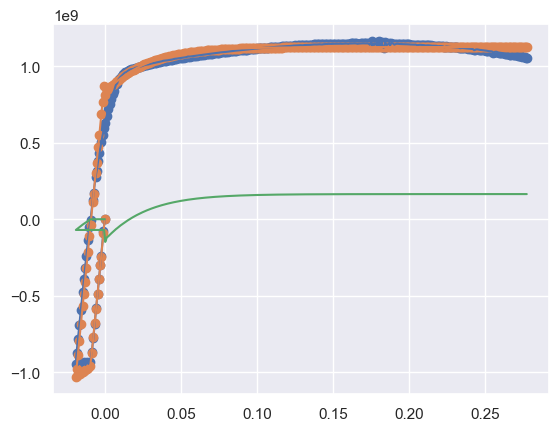

In [8]:
plt.plot(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100])
plt.scatter(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100])
plt.plot(type_6.Strain.values[:end:100], stress_predicted)
plt.scatter(type_6.Strain.values[:end:100], stress_predicted)
plt.plot(type_6.Strain.values[:end:100], np.array(a_model_fitted.alphas)*a_model_fitted.G)

In [9]:
end = 50000
stress_predicted = a_model_fitted.predict(strain=type_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

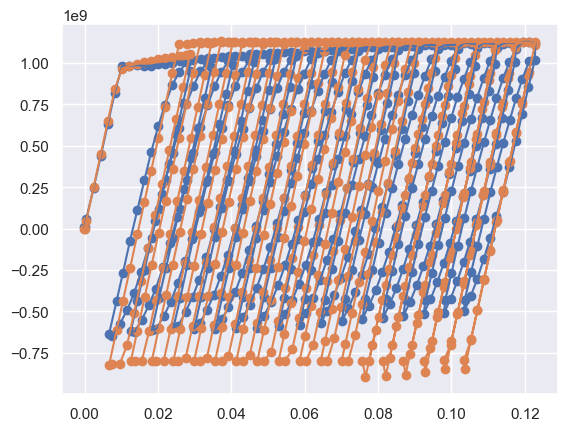

In [10]:
plt.plot(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100])
plt.scatter(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100])
plt.plot(type_2.Strain.values[:end:100], stress_predicted)
plt.scatter(type_2.Strain.values[:end:100], stress_predicted)
#plt.plot(type_2.Strain.values[:end:100], np.array(a_model_fitted.alphas)*a_model_fitted.G)

In [16]:
end = 150000
step = 10
stress_predicted = a_model_fitted.predict(strain=type_5.Strain.values[:end:step], upper_yield_strength=uys, downer_yield_strength=dys)

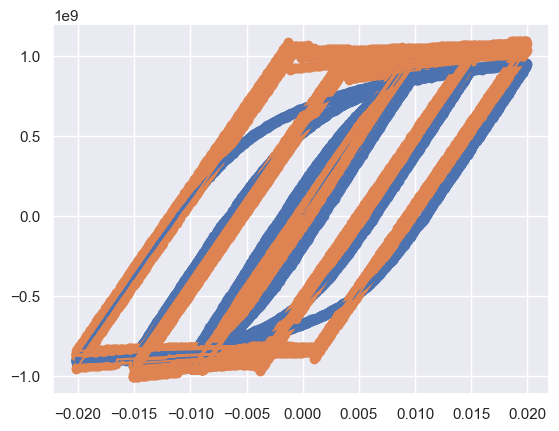

In [17]:
plt.plot(type_5.Strain.values[:end:step], type_5.Stress.values[:end:step])
plt.scatter(type_5.Strain.values[:end:step], type_5.Stress.values[:end:step])
plt.plot(type_5.Strain.values[:end:step], stress_predicted)
plt.scatter(type_5.Strain.values[:end:step], stress_predicted)
#plt.plot(type_2.Strain.values[:end:100], np.array(a_model_fitted.alphas)*a_model_fitted.G)

In [23]:
end = 15000
step = 100
stress_predicted = a_model_fitted.predict(strain=type_1.Strain.values[:end:step], upper_yield_strength=uys, downer_yield_strength=dys)

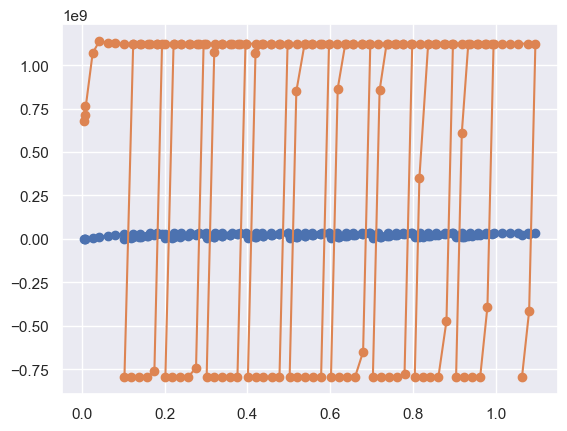

In [24]:
plt.plot(type_1.Strain.values[:end:step], type_1.Stress.values[:end:step])
plt.scatter(type_1.Strain.values[:end:step], type_1.Stress.values[:end:step])
plt.plot(type_1.Strain.values[:end:step], stress_predicted)
plt.scatter(type_1.Strain.values[:end:step], stress_predicted)